In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sma
from scipy import stats 

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Import the dataset

In [87]:
data = pd.read_excel('Concrete_Data.xlsx')

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   ccs                 1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [89]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
ccs,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


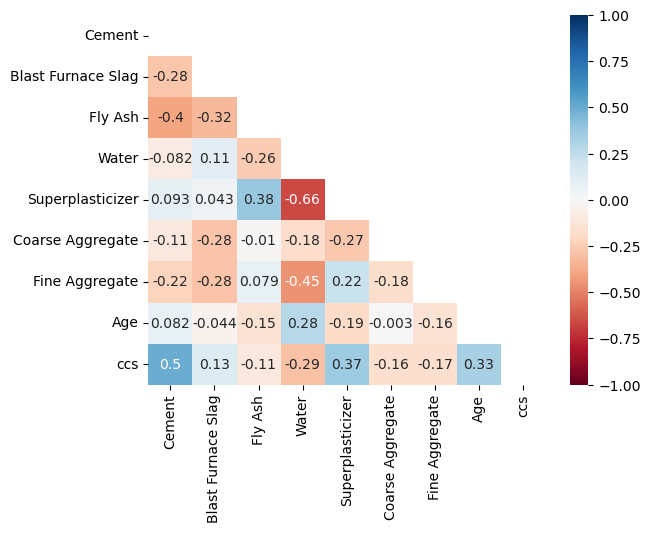

In [90]:
# Correlation Plot
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu',
            mask=np.triu(data.corr()))
plt.show()

## Treat the defects

In [91]:
# Missing Values
data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
ccs                   0
dtype: int64

In [92]:
# Duplicates
data[data.duplicated()]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,ccs
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [93]:
data.drop_duplicates(inplace=True)

In [94]:
data.shape

(1005, 9)

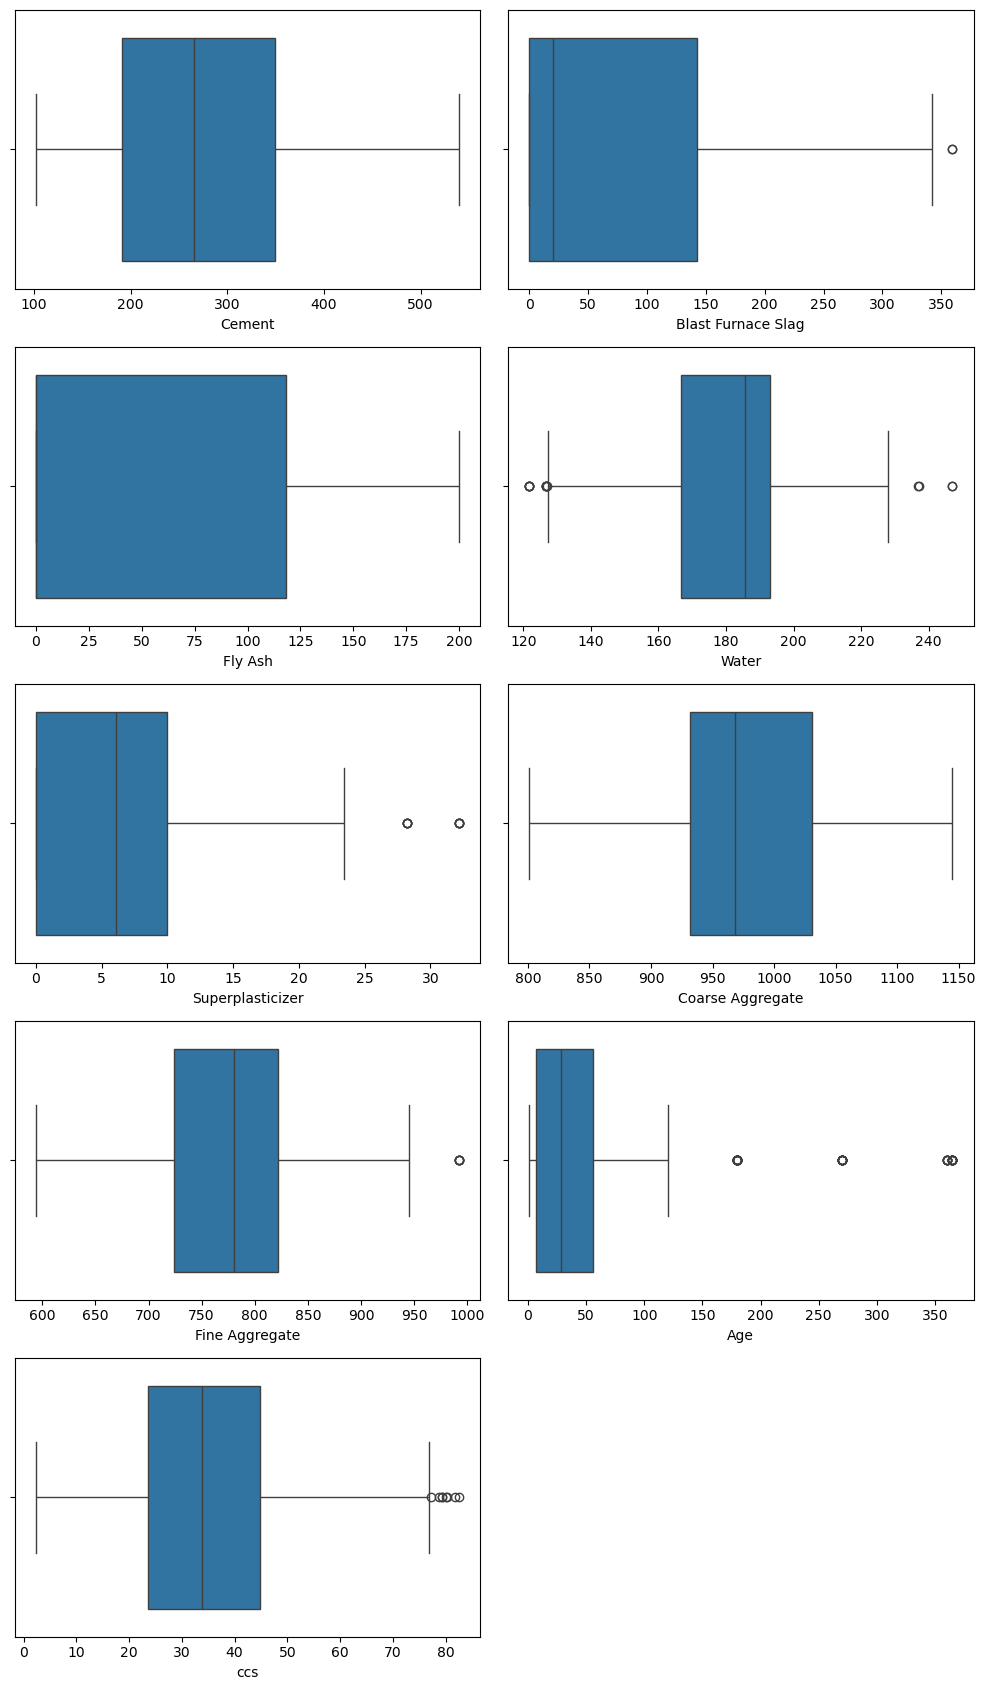

In [95]:
# Check for the outliers
t=1
plt.figure(figsize=(10,17))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

In [96]:
# Cappping
for i in data.columns:
    q3,q1 = np.percentile(data[i],[75,25])
    iqr = q3-q1
    ul,ll = q3+1.5*iqr, q1-1.5*iqr
    data[i] = data[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

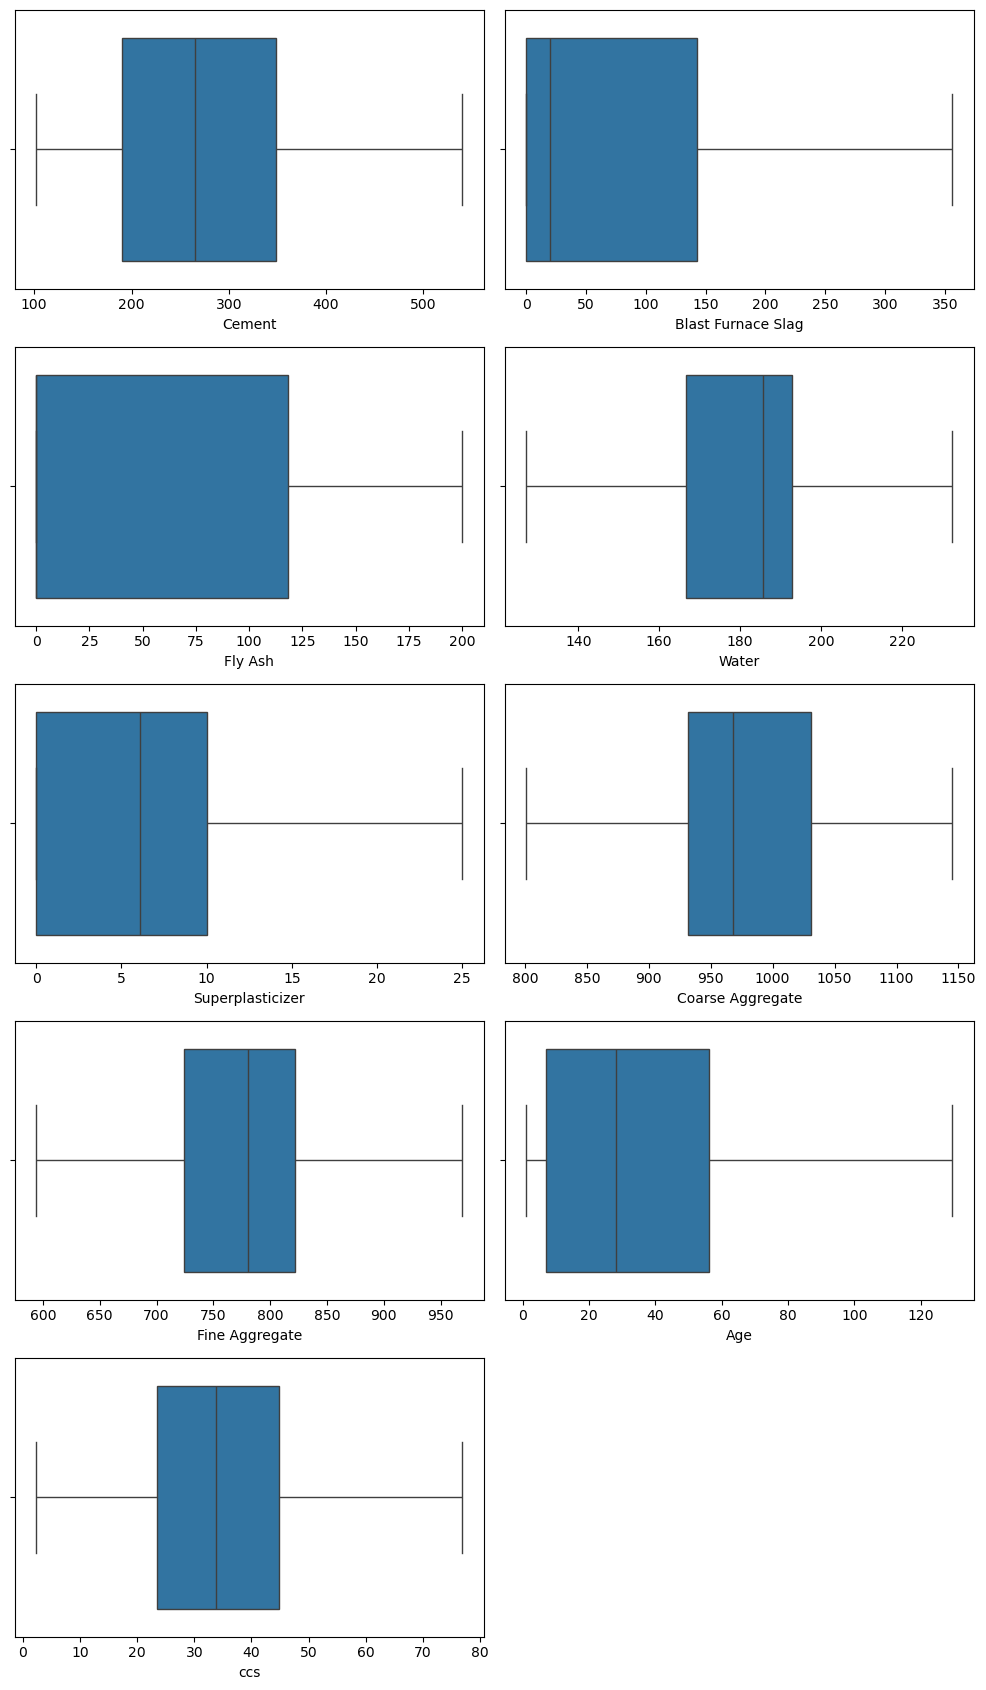

In [97]:
t=1
plt.figure(figsize=(10,17))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

## Linear Regression Analysis

In [98]:
# lets split x and y
y=data['ccs']
x=data.drop(columns='ccs')

In [99]:
# add a constant in x to have an intercept in a model
x_c=sma.add_constant(x)

In [100]:
sma.OLS(y,x_c).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ccs   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     322.7
Date:                Fri, 06 Dec 2024   Prob (F-statistic):          2.10e-270
Time:                        12:36:21   Log-Likelihood:                -3583.1
No. Observations:                1005   AIC:                             7184.
Df Residuals:                     996   BIC:                             7228.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9349     22.392      0.176      0.861     -40.006      47.876
Cement                 0.1109      0.007     15.544      0.000       0.097       0.125
Blast Furnace Slag     0.0920      0.008     10.829      0.000       0.075       0.109
Fly Ash                0.0737      0.010      7.080      0.000       0.053       0.094
Water                 -0.1826      0.034     -5.337      0.000      -0.250      -0.115
Superplasticizer       0.2468      0.083      2.986      0.003       0.085       0.409
Coarse Aggregate       0.0060      0.008      0.766      0.444      -0.009       0.021
Fine Aggregate         0.0079      0.009      0.876      0.381      -0.010       0.026
Age                    0.2498      0.008     32.126      0.000       0.235       0.265
==============================================================================
Omnibus:                        5.538   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                6.047
Skew:                           0.107   Prob(JB):                       0.0486
Kurtosis:                       3.314   Cond. No.                     1.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

assumption 2 : Multicolinearity

In [101]:
# high condition no. suggest there is multi colinearity in the model

# in order to find which columns have multicolinearity lets find VIF

vif=[]
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))
pd.DataFrame({'VIF':vif},index=x.columns).sort_values(by='VIF',ascending=False)

,VIF
Coarse Aggregate,85.016957
Water,82.028328
Fine Aggregate,72.308018
Cement,15.213900
Superplasticizer,5.513072
Fly Ash,4.325332
Blast Furnace Slag,3.307520
Age,2.250063


In [102]:
sma.OLS(y,x_c.drop(columns='Coarse Aggregate')).fit().rsquared

0.7214599162155249

In [103]:
# lets drop Coarse Aggregate and check VIF
x_c.drop(columns='Coarse Aggregate',inplace=True)
x.drop(columns='Coarse Aggregate',inplace=True)

vif=[]
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))
pd.DataFrame({'VIF':vif},index=x.columns).sort_values(by='VIF',ascending=False)

,VIF
Water,72.333537
Fine Aggregate,47.949524
Cement,14.267535
Superplasticizer,5.464804
Fly Ash,4.159872
Blast Furnace Slag,3.278204
Age,2.248795


In [104]:
sma.OLS(y,x_c.drop(columns='Fine Aggregate')).fit().rsquared

0.7214079179608108

In [105]:
# lets drop Coarse Aggregate and check VIF
x_c.drop(columns='Fine Aggregate',inplace=True)
x.drop(columns='Fine Aggregate',inplace=True)

vif=[]
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))
pd.DataFrame({'VIF':vif},index=x.columns).sort_values(by='VIF',ascending=False)

,VIF
Water,21.626638
Cement,13.954376
Fly Ash,4.068454
Superplasticizer,3.918141
Blast Furnace Slag,2.991824
Age,2.234706


In [106]:
# lets apply feature engineering so we keep both cement and water 
# water in model to cement ratio

x['water_cement_ratio']=x['Water']/x['Cement']
x_c['water_cement_ratio']=x_c['Water']/x_c['Cement']

x.drop(columns=['Water','Cement'],inplace=True)
x_c.drop(columns=['Water','Cement'],inplace=True)

vif=[]
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values,i))
pd.DataFrame({'VIF':vif},index=x.columns).sort_values(by='VIF',ascending=False)

,VIF
water_cement_ratio,5.594984
Fly Ash,3.563203
Blast Furnace Slag,2.973004
Superplasticizer,2.544618
Age,1.864683


In [107]:
sma.OLS(y,x_c).fit().rsquared

0.6653811107483301

In [108]:
# lets fit the model over here 
# model with intercept
model=sma.OLS(y,x_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ccs   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     397.3
Date:                Fri, 06 Dec 2024   Prob (F-statistic):          1.49e-234
Time:                        12:36:21   Log-Likelihood:                -3675.6
No. Observations:                1005   AIC:                             7363.
Df Residuals:                     999   BIC:                             7393.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 39.5962      1.013     39.086      0.000      37.608      41.584
Blast Furnace Slag     0.0798      0.005     17.208      0.000       0.071       0.089
Fly Ash                0.0396      0.007      5.841      0.000       0.026       0.053
Superplasticizer       0.6002      0.068      8.862      0.000       0.467       0.733
Age                    0.2369      0.008     28.279      0.000       0.220       0.253
water_cement_ratio   -32.9598      1.296    -25.432      0.000     -35.503     -30.417
==============================================================================
Omnibus:                       49.960   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.364
Skew:                           0.441   Prob(JB):                     5.26e-16
Kurtosis:                       3.951   Cond. No.                         623.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# feature improtances
model.pvalues.sort_values()

const                 1.644812e-203
Age                   1.019237e-129
water_cement_ratio    2.023594e-110
Blast Furnace Slag     2.551503e-58
Superplasticizer       3.541361e-18
Fly Ash                7.008803e-09
dtype: float64

assumption 3 : linearity


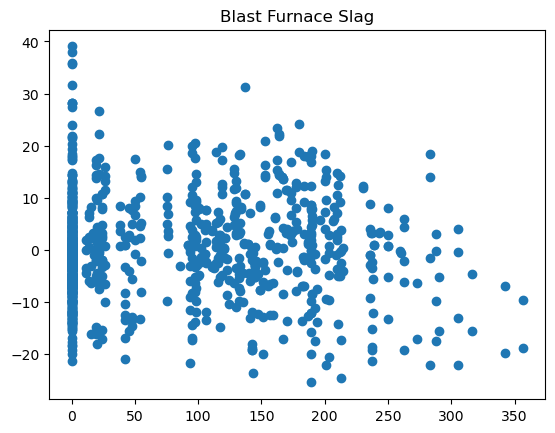

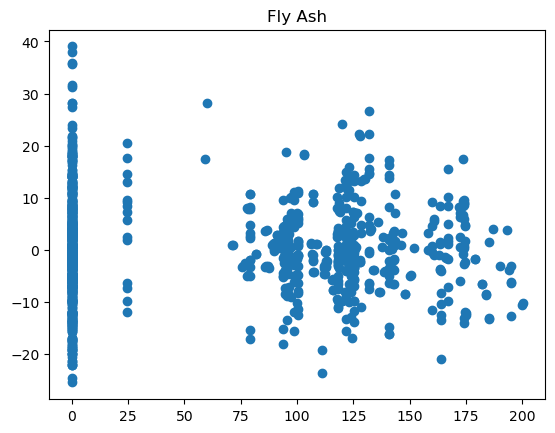

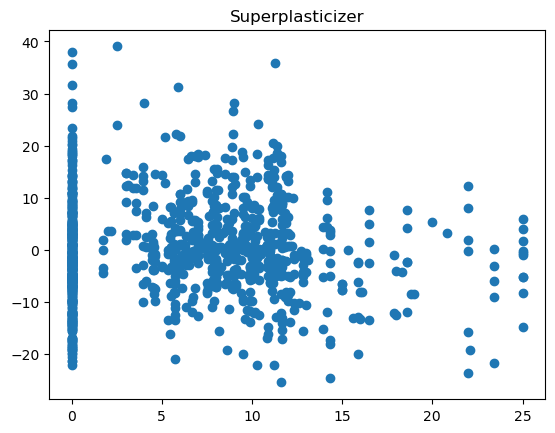

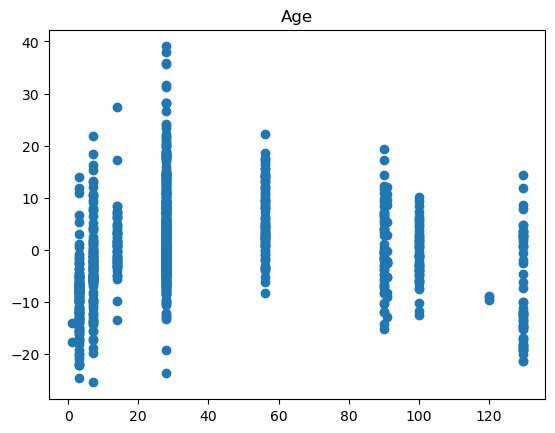

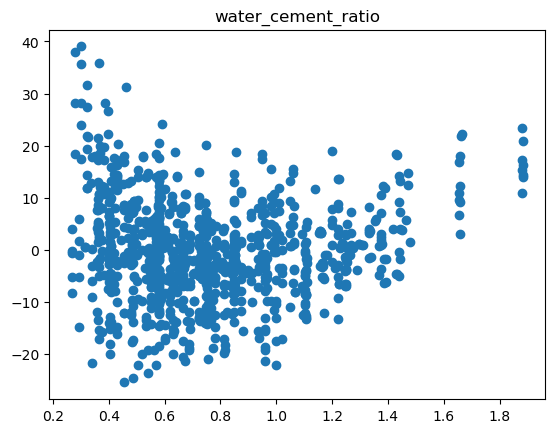

In [110]:
for i in x.columns:
    plt.scatter(y=model.resid,x=x[i])
    plt.title(i)
    plt.show()

In [111]:
# rainbow test
from statsmodels.stats.diagnostic import linear_rainbow

# ho: linear relation b/w independent var and target variable 
# ha: non linear relation b/w independent var and target variable 

linear_rainbow(model)
(teststats,pvalue)=linear_rainbow(model)
print(f'teststats : {teststats} , pvalue {pvalue}')

if pvalue>0.05:
    print('fail to reject ho')
else:
    print('reject ho')

teststats : 0.9376282953485992 , pvalue 0.7640822761645768
fail to reject ho


assumption 4 : auto correlation

- d=1.221
- so we can conclude that there is +ve correlation. there is also a chance that this value because of small sample size

assumption 5 : homoscadaticity

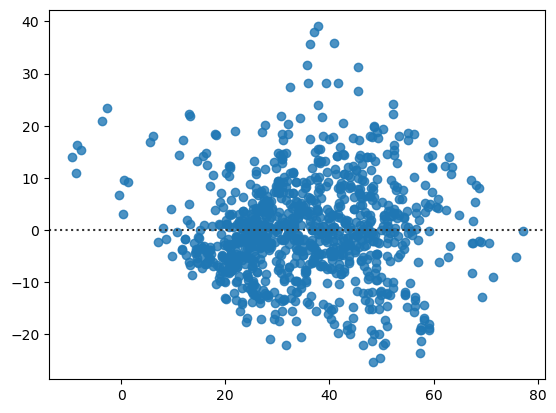

In [112]:
# residual plot

sns.residplot(x=model.fittedvalues,y=model.resid)
plt.show()

In [113]:
# bruech pagan test 

# ho: there is homoscadascity
# ha: there is no homoscadascity

pval=sma.stats.diagnostic.het_breuschpagan(exog_het=x_c.values,resid=model.resid)[1]

if pval>0.05:
    print('fail to reject ho')
else:
    print('reject ho')

reject ho


assumption 6 : residual normality

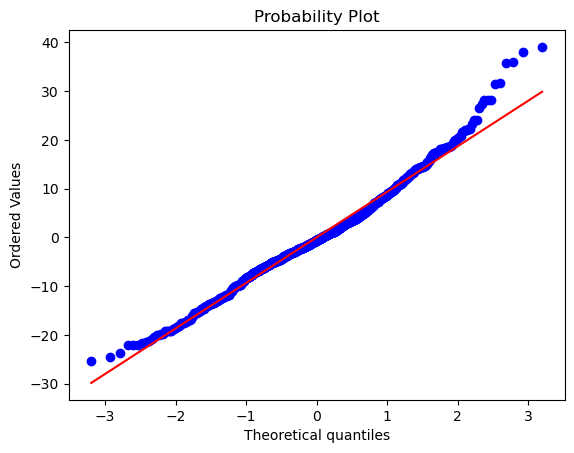

In [114]:
model.resid
stats.probplot(model.resid,plot=plt)
plt.show()

In [115]:
# Shapiro (n<5000)
# ho: data is normal
# ha: data is not normal

stats.shapiro(model.resid)
# reject ho as p_val<alpha
pvalue=stats.shapiro(model.resid)[1]
if pvalue>0.05:
    print('fail to reject ho')
else:
    print('reject ho')

reject ho


## Bussiness Interpretation

In [116]:
# significant columns

model.pvalues.sort_values()

const                 1.644812e-203
Age                   1.019237e-129
water_cement_ratio    2.023594e-110
Blast Furnace Slag     2.551503e-58
Superplasticizer       3.541361e-18
Fly Ash                7.008803e-09
dtype: float64

In [117]:
# Effect of independent variables on ccs

model.conf_int()

,0,1
const,37.608241,41.584138
Blast Furnace Slag,0.070708,0.088910
Fly Ash,0.026271,0.052853
Superplasticizer,0.467261,0.733054
Age,0.220434,0.253308
water_cement_ratio,-35.502908,-30.416609


## Predictive Modelling

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

In [119]:
y=data['ccs']
x=data.drop(columns='ccs')

In [120]:
from sklearn.preprocessing import PowerTransformer

In [121]:
pt=PowerTransformer(standardize=False)

In [122]:
x_t=pd.DataFrame(pt.fit_transform(x_c))
x_t.head()

,0,1,2,3,4,5
0,1.0,-0.000000,-0.0,1.47685,4.366964,0.221826
1,1.0,-0.000000,-0.0,1.47685,4.366964,0.221826
2,1.0,4.896472,-0.0,0.00000,7.142743,0.377556
3,1.0,4.896472,-0.0,0.00000,7.142743,0.377556
4,1.0,4.825518,-0.0,0.00000,7.142743,0.447698


In [123]:
# train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [124]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(804, 8) (201, 8) (804,) (201,)


In [125]:
# base model

model_lr=LinearRegression()

model_lr.fit(x_train,y_train)

LinearRegression()

In [126]:
model_lr.intercept_

-8.102624717950853

In [127]:
model_lr.coef_

array([ 0.11408885,  0.09772627,  0.08242726, -0.1917599 ,  0.17141977,
        0.01168966,  0.01659225,  0.25023773])

In [128]:
y_pred=model_lr.predict(x_test)

In [ ]:
print('r2 score : ',r2_score(y_test,y_pred))
print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ',(mean_squared_error(y_test,y_pred))**0.5)
print('MAE : ',mean_absolute_error(y_test,y_pred))
print('MAPE : ',mean_absolute_percentage_error(y_test,y_pred))

r2 score :  0.7179665342052456
MSE :  73.66535812030423
RMSE :  8.582852563122836
MAE :  6.690355643332342
MAPE :  0.253258830067976


In [130]:
# for example if we use decision tree regressor

from sklearn.tree import DecisionTreeRegressor

model_dt=DecisionTreeRegressor(max_depth=5)

model_dt.fit(x_train,y_train)

y_pred_dt=model_dt.predict(x_test)

print('r2 score : ',r2_score(y_test,y_pred_dt))
print('MSE : ',mean_squared_error(y_test,y_pred_dt))
print('RMSE : ',(mean_squared_error(y_test,y_pred_dt))**0.5)
print('MAE : ',mean_absolute_error(y_test,y_pred_dt))
print('MAPE : ',mean_absolute_percentage_error(y_test,y_pred_dt))

r2 score :  0.7704397336727098
MSE :  59.959690179103475
RMSE :  7.743364267494037
MAE :  6.095388766861035
MAPE :  0.24363547461456264


In [131]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

model_xgb=XGBRegressor()

model_xgb.fit(x_train,y_train)

y_pred_xgb=model_xgb.predict(x_test)

print('r2 score : ',r2_score(y_test,y_pred_xgb))
print('MSE : ',mean_squared_error(y_test,y_pred_xgb))
print('RMSE : ',(mean_squared_error(y_test,y_pred_xgb))**0.5)
print('MAE : ',mean_absolute_error(y_test,y_pred_xgb))
print('MAPE : ',mean_absolute_percentage_error(y_test,y_pred_xgb))

r2 score :  0.9358787486787365
MSE :  16.74806544107206
RMSE :  4.092440035122331
MAE :  2.8562138449198464
MAPE :  0.1053511763135944


In [133]:
# lets suppose we have tunned and ot XGB as generalised model. it can be deployed
c,bfs,fly,water,sup,ca,fa,age=450,100,0,130,2,900,550,30

In [134]:
model_xgb.predict([[c,bfs,fly,water,sup,ca,fa,age]])

array([55.859013], dtype=float32)

In [135]:
model_lr.predict([[c,bfs,fly,water,sup,ca,fa,age]])

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([55.577596])

In [136]:
model_dt.predict([[c,bfs,fly,water,sup,ca,fa,age]])

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([65.87411084])

In [137]:
y_test.head(3)

734    40.658400
690    23.523542
322    42.030457
Name: ccs, dtype: float64

In [138]:
y_pred_dt[:3]

array([31.7922467 , 20.36529128, 42.48540277])

In [139]:
y_pred[:3]

array([43.18528388, 31.25684596, 40.64217626])

In [140]:
y_pred_xgb[:3]

array([37.559772, 22.271505, 43.14089 ], dtype=float32)

### Bias and Variance

In [141]:
# l.r 

# train scores and errors
y_pred_1=model_lr.predict(x_train)
print('r2 score train : ',r2_score(y_train,y_pred_1))
print('MSE : ',mean_squared_error(y_train,y_pred_1))
print('RMSE : ',(mean_squared_error(y_train,y_pred_1))**0.5)
print('MAE : ',mean_absolute_error(y_train,y_pred_1))
print('MAPE : ',mean_absolute_percentage_error(y_train,y_pred_1))

# test scores and errors
y_pred=model_lr.predict(x_test)
print('\nr2 score test : ',r2_score(y_test,y_pred))
print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ',(mean_squared_error(y_test,y_pred))**0.5)
print('MAE : ',mean_absolute_error(y_test,y_pred))
print('MAPE : ',mean_absolute_percentage_error(y_test,y_pred))

r2 score train :  0.720005047226254
MSE :  73.64364725702883
RMSE :  8.581587688594041
MAE :  6.721833014216682
MAPE :  0.24623455173687744

r2 score test :  0.7179665342052456
MSE :  73.66535812030423
RMSE :  8.582852563122836
MAE :  6.690355643332342
MAPE :  0.253258830067976


In [142]:
# xgboost

# train scores and errors
y_pred_xgb1=model_lr.predict(x_train)
print('r2 score train : ',r2_score(y_train,y_pred_xgb1))
print('MSE : ',mean_squared_error(y_train,y_pred_xgb1))
print('RMSE : ',(mean_squared_error(y_train,y_pred_xgb1))**0.5)
print('MAE : ',mean_absolute_error(y_train,y_pred_xgb1))
print('MAPE : ',mean_absolute_percentage_error(y_train,y_pred_xgb1))

# test scores and errors
y_pred_xgb=model_lr.predict(x_test)
print('\nr2 score test : ',r2_score(y_test,y_pred_xgb))
print('MSE : ',mean_squared_error(y_test,y_pred_xgb))
print('RMSE : ',(mean_squared_error(y_test,y_pred_xgb))**0.5)
print('MAE : ',mean_absolute_error(y_test,y_pred_xgb))
print('MAPE : ',mean_absolute_percentage_error(y_test,y_pred_xgb))

r2 score train :  0.720005047226254
MSE :  73.64364725702883
RMSE :  8.581587688594041
MAE :  6.721833014216682
MAPE :  0.24623455173687744

r2 score test :  0.7179665342052456
MSE :  73.66535812030423
RMSE :  8.582852563122836
MAE :  6.690355643332342
MAPE :  0.253258830067976


# Regularization (Ridge ,LASSO and Elastic net)

In [143]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV

In [144]:
model_ridge=Ridge(alpha=10)

In [145]:
model_ridge.fit(x_train,y_train)

Ridge(alpha=10)

In [146]:
model_ridge.score(x_test,y_test)

0.717961890928128

In [147]:
# LASSO 
model_lasso=Lasso(alpha=10)

In [148]:
model_lasso.fit(x_train,y_train)

Lasso(alpha=10)

In [149]:
model_lasso.score(x_test,y_test)

0.7167265434955663

In [150]:
# Elastic net 

model_en=ElasticNet(alpha=10,l1_ratio=0.2)

In [151]:
model_en.fit(x_train,y_train)

ElasticNet(alpha=10, l1_ratio=0.2)

In [152]:
model_en.score(x_test,y_test)

0.7145909837120712

In [153]:
pd.DataFrame({'LR':model_lr.coef_,
              'Ridge':model_ridge.coef_,
              'Lasso':model_lasso.coef_,
              'EN':model_en.coef_},index=x.columns)

,LR,Ridge,Lasso,EN
Cement,0.114089,0.114090,0.105597,0.112401
Blast Furnace Slag,0.097726,0.097727,0.086403,0.095179
Fly Ash,0.082427,0.082432,0.073318,0.082761
Water,-0.191760,-0.191781,-0.230551,-0.218206
Superplasticizer,0.171420,0.171270,0.000000,0.031030
Coarse Aggregate,0.011690,0.011686,-0.000000,0.005692
Fine Aggregate,0.016592,0.016592,0.005396,0.012946
Age,0.250238,0.250235,0.239630,0.246610


### Hyper-parameter Tunning

In [154]:
# lets tune alpha parameter in Lasso

grid={'alpha':[0.1,1,5,10,20,50,100]}

In [155]:
gscv=GridSearchCV(estimator=model_lasso,param_grid=grid,scoring='r2',cv=5,verbose=3)

In [156]:
gscv.fit(x,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .........................alpha=0.1;, score=0.569 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.595 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.640 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.763 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.511 total time=   0.0s
[CV 1/5] END ...........................alpha=1;, score=0.593 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.590 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.635 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.760 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.516 total time=   0.0s
[CV 1/5] END ...........................alpha=5;, score=0.660 total time=   0.0s
[CV 2/5] END ...........................alpha=5;,

GridSearchCV(cv=5, estimator=Lasso(alpha=10),
             param_grid={'alpha': [0.1, 1, 5, 10, 20, 50, 100]}, scoring='r2',
             verbose=3)

In [157]:
gscv.best_score_

0.6285395708330986

In [158]:
gscv.best_params_

{'alpha': 10}

In [159]:
gscv.best_score_

0.6285395708330986

In [160]:
# grid for Elastic net


grid1={'alpha':[0.1,1,5,10,20,50,100],
      'l1_ratio':[0.01,0.05,0.10,0.15,0.20]}

In [161]:
gscv=GridSearchCV(estimator=ElasticNet(),param_grid=grid1,scoring='r2',cv=5,verbose=3)

In [162]:
gscv.fit(x,y)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ..........alpha=0.1, l1_ratio=0.01;, score=0.568 total time=   0.0s
[CV 2/5] END ..........alpha=0.1, l1_ratio=0.01;, score=0.596 total time=   0.0s
[CV 3/5] END ..........alpha=0.1, l1_ratio=0.01;, score=0.641 total time=   0.0s
[CV 4/5] END ..........alpha=0.1, l1_ratio=0.01;, score=0.763 total time=   0.0s
[CV 5/5] END ..........alpha=0.1, l1_ratio=0.01;, score=0.511 total time=   0.0s
[CV 1/5] END ..........alpha=0.1, l1_ratio=0.05;, score=0.568 total time=   0.0s
[CV 2/5] END ..........alpha=0.1, l1_ratio=0.05;, score=0.596 total time=   0.0s
[CV 3/5] END ..........alpha=0.1, l1_ratio=0.05;, score=0.641 total time=   0.0s
[CV 4/5] END ..........alpha=0.1, l1_ratio=0.05;, score=0.763 total time=   0.0s
[CV 5/5] END ..........alpha=0.1, l1_ratio=0.05;, score=0.511 total time=   0.0s
[CV 1/5] END ...........alpha=0.1, l1_ratio=0.1;, score=0.568 total time=   0.0s
[CV 2/5] END ...........alpha=0.1, l1_ratio=0.1

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 20, 50, 100],
                         'l1_ratio': [0.01, 0.05, 0.1, 0.15, 0.2]},
             scoring='r2', verbose=3)

In [163]:
gscv.best_estimator_

ElasticNet(alpha=20, l1_ratio=0.01)

In [164]:
gscv.best_params_

{'alpha': 20, 'l1_ratio': 0.01}

In [165]:
gscv.best_score_

0.6279115503067937

### Gadient Descent

In [166]:
# we need to scale the data
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [167]:
scaler=StandardScaler()
x_train_s=pd.DataFrame(scaler.fit_transform(x_train),columns=x.columns)
x_test_s=pd.DataFrame(scaler.transform(x_test),columns=x.columns)
x_test_s

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,0.666490,-0.832144,-0.845930,0.480615,-1.034552,1.046746,0.450586,1.428143
1,0.078560,1.363116,-0.845930,0.480615,-1.034552,-0.569106,-0.676243,-0.874498
2,-0.296366,-0.832144,0.701197,-1.109409,1.151342,0.157506,1.439155,0.484893
3,1.880904,-0.832144,0.078429,-1.865245,-0.710083,1.594050,-1.625151,-0.291902
4,-0.902609,0.586772,-0.845930,0.185037,-1.034552,1.403797,-0.101709,-0.291902
...,...,...,...,...,...,...,...,...
196,2.121859,-0.832144,-0.845930,0.855953,-1.034552,1.945889,-1.971107,-0.680299
197,-0.483540,-0.832144,1.005296,0.632158,0.012287,0.683179,-0.184120,-0.985468
198,-1.714145,0.917204,-0.845930,0.480615,-1.034552,-1.155503,2.093877,-0.291902
199,1.048163,0.278063,-0.845930,-1.119261,1.031801,-1.610287,1.892481,1.455886


In [168]:
model_sgd=SGDRegressor(penalty=None,learning_rate='constant',eta0=0.01)

In [169]:
model_sgd.fit(x_train_s,y_train)

SGDRegressor(learning_rate='constant', penalty=None)

In [172]:
model_sgd.intercept_

array([34.63261392])

In [175]:
model_sgd.coef_

array([10.90968792,  7.17917703,  5.83860622, -4.68240471,  0.79032986,
        0.16813886,  1.9546593 ,  8.75140641])

In [170]:
model_sgd.score(x_test_s,y_test)

0.6640858920462908

In [171]:
y_pred_sgd_train=model_sgd.predict(x_train_s)
y_pred_sgd_test=model_sgd.predict(x_test_s)

In [176]:
# xgboost

# train scores and errors
print('r2 score train : ',r2_score(y_train,y_pred_sgd_train))
print('MSE : ',mean_squared_error(y_train,y_pred_sgd_train))
print('RMSE : ',(mean_squared_error(y_train,y_pred_sgd_train))**0.5)
print('MAE : ',mean_absolute_error(y_train,y_pred_sgd_train))
print('MAPE : ',mean_absolute_percentage_error(y_train,y_pred_sgd_train))

# test scores and errors
print('\nr2 score test : ',r2_score(y_test,y_pred_sgd_test))
print('MSE : ',mean_squared_error(y_test,y_pred_sgd_test))
print('RMSE : ',(mean_squared_error(y_test,y_pred_sgd_test))**0.5)
print('MAE : ',mean_absolute_error(y_test,y_pred_sgd_test))
print('MAPE : ',mean_absolute_percentage_error(y_test,y_pred_sgd_test))

r2 score train :  0.6977877139186992
MSE :  79.48720065284857
RMSE :  8.915559469424707
MAE :  6.926543359603779
MAPE :  0.24974771919166208

r2 score test :  0.6640858920462908
MSE :  87.73864119402234
RMSE :  9.36689068976586
MAE :  7.39224197510849
MAPE :  0.2716858203671423


### Batch Gradient Descent

In [177]:
def batch_grad_desc(x,y,lr,iterat):
    X = np.array(x)
    const = np.ones(shape=(X.shape[0],1))
    X = np.concatenate([const,X],axis=1)
    Y = np.array(y)
    Y = Y.reshape(len(y),1)
    W = np.full(shape=(X.shape[1],1),fill_value=0)
    
    for i in range(iterat):
        ypred = X @ W
        dW = np.dot(X.T, ypred - Y)
        W = W - (lr * dW)
        
    return W

In [185]:
batch_grad_desc(x_train_s,y_train,lr=0.01,iterat=5)

array([[ 612820.56056688],
       [ 339714.812726  ],
       [-250621.70065692],
       [ 216020.76522983],
       [-675371.22295193],
       [ 710791.37189605],
       [-191546.37625314],
       [ 383879.3110346 ],
       [ -90008.3791995 ]])